# Compute the sensitivity of MATHUSLA to the scalar portal

In [1]:
]st

Status `~/Documents/Research/Projects/SensCalc/Code/SensMC/Project.toml`
  [864edb3b] DataStructures v0.18.13
⌃ [31c24e10] Distributions v0.25.86
⌃ [e9467ef8] GLMakie v0.8.2
⌃ [5c1252a2] GeometryBasics v0.4.6
  [7073ff75] IJulia v1.24.0
⌃ [682c06a0] JSON v0.21.3
  [3f54b04b] LorentzVectors v0.4.3
  [ea0cff06] MDBM v0.1.6 `https://github.com/JLTastet/MDBM.jl#3788144`
⌅ [ee78f7c6] Makie v0.19.2
  [c03570c3] Memoize v0.4.4
  [e1d29d7a] Missings v1.1.0
  [3b2b4ff1] Multisets v0.4.4
⌃ [bac558e1] OrderedCollections v1.4.1
  [c46f51b8] ProfileView v1.7.1
  [438e738f] PyCall v1.95.1
  [d330b81b] PyPlot v2.11.1
⌃ [f2b01f46] Roots v2.0.10
⌃ [90137ffa] StaticArrays v1.5.18
⌅ [2913bbd2] StatsBase v0.33.21
  [8ba89e20] Distributed
  [37e2e46d] LinearAlgebra
  [1a1011a3] SharedArrays
Info Packages marked with ⌃ and ⌅ have new versions available, but those with ⌅ are restricted by compatibility constraints from upgrading. To see why use `status --outdated`


In [2]:
using Random
Random.seed!(25269);

In [3]:
include("$(@__DIR__)/../lib/IncludeAll.jl")
include("$(@__DIR__)/../scripts/GenerateEvents.jl")
include("$(@__DIR__)/../scripts/ScanSensitivity.jl");

  Activating project at `~/Documents/Research/Projects/SensCalc/Code/SensMC`


In [4]:
@time mS, θ, debug = find_scalar_portal_sensitivity_mdbm(
    range(log10(0.1), log10(4.5), length=12),
    range(-6, -1, length=11), (1., 0.),
    3*ab^-1, :foresee_beauty, ["B -> S pi", "B -> S K?"],
    MATHUSLA100_geometry_homepage;
    iterations=2, Nsamples=30000000, CL=0.9,
    acceptance=:two_opposite_charge_tracks,
    meson_spectrums_root="$(@__DIR__)/../data/FORESEE_spectrums")

28436.648179 seconds (135.29 G allocations: 6.597 TiB, 1.73% gc time, 0.02% compilation time: 1% of which was recompilation)


([0.10506329351025953, 0.10380216389003981, 0.11431404515579531, 0.11296500222222781, 0.12444655921251424, 0.12288484069840103, 0.1354720040975265, 0.14747932609088782, 0.1625209240774498, 0.1605656525104205  …  3.6490282823895623, 3.711793596150468, 3.6118311951161917, 3.511618373265894, 3.8715538996950065, 3.964709090961959, 3.9463517450224934, 3.9086413924761843, 3.8554880544258903, 3.739140514909527], [0.0001332365596010791, 0.00013399935991905535, 0.00012751525098485055, 0.00012772442535400295, 0.00012243438261449086, 0.00012124597743364832, 0.00011772266460498901, 0.00011325568127987516, 0.00011007047633796345, 0.00010896649315494312  …  1.6119653659733669e-6, 6.67130828955389e-6, 8.628646752105299e-6, 1.1097572077291616e-5, 1.6343255936189015e-6, 2.0522417206734862e-6, 2.736810162392755e-6, 3.6325672980695096e-6, 4.797711547708783e-6, 6.107941966515604e-6], (mass_evaluated = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1  …  4.500000000000001, 4.500000000000001, 4.50000000000

Save the raw output (may require further processing):

In [5]:
save_sensitivity_mdbm("$(@__DIR__)/../tables/sensitivity/MATHUSLA", "MATHUSLA_scalar_sensitivity_CL90", mS, θ, debug; column_names=("mS", "theta"))

Save the curve as an unordered list of $(m_S, \theta^2)$ pairs:

In [6]:
using MDBM
using DataFrames
x, y = getinterpolatedsolution(debug.mdbm)
df = DataFrame(mS = 10.0 .^ x, theta2 = (10.0 .^ y) .^ 2)

Row,mS,theta2
,Float64,Float64
1,0.105063,1.7752e-8
2,0.103802,1.79558e-8
3,0.114314,1.62601e-8
4,0.112965,1.63135e-8
5,0.124447,1.49902e-8
6,0.122885,1.47006e-8
7,0.135472,1.38586e-8
8,0.147479,1.28268e-8
9,0.162521,1.21155e-8


In [7]:
using PyPlot
PyPlot.svg(true);

In [8]:
function make_plot(; title="", xlabel=raw"$m_S\;[\mathrm{GeV}]$", ylabel=raw"$theta^2$", figsize=(6.4, 4.8))
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_yscale("log")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel);
    ax.grid(color="gray", linestyle=":")
    ax.autoscale()
    ax.set_title(title)
    fig, ax
end

make_plot (generic function with 1 method)

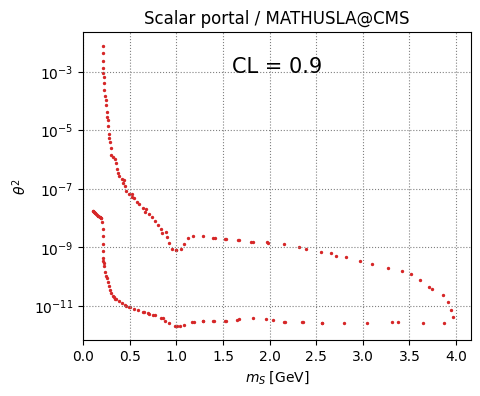

PyObject Text(0.5, 0.92, 'CL = 0.9')

In [9]:
fig, ax = make_plot(title="Scalar portal / MATHUSLA@CMS", xlabel=raw"$m_S\;[\mathrm{GeV}]$", ylabel=raw"$\theta^2$", figsize=(5,4))
ax.scatter(df.mS, df.theta2, s=2, color="tab:red")
ax.autoscale()
ax.set_xlim(left=0)
#ax.legend()
ax.text(0.5, 0.92, "CL = 0.9", fontsize=15, transform=ax.transAxes, ha="center", va="top")

In [10]:
CSV.write("$(@__DIR__)/../tables/sensitivity/MATHUSLA/MATHUSLA_scalar_sensitivity_CL90_unordered.csv", df)

"/Users/jl/Documents/Research/Projects/SensCalc/Code/SensMC/notebooks/../tables/sensitivity/MATHUSLA/MATHUSLA_scalar_sensitivity_CL90_unordered.csv"